About Dataset
This dataset contains information about heart attacks in youth (under 25 years) and adults (25+ years) across various states in Germany from 2015 to 2023. Each row represents one individual and includes details about their health, lifestyle, and environment. The data is unevenly distributed to make analysis more interesting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset 

In [2]:
file_path = "Heart Attack Germany.csv"
data = pd.read_csv(file_path)

In [3]:
print("First five rows of the dataset:")
print(data.head())

First five rows of the dataset:
          State Age_Group  Heart_Attack_Incidence  Year  Gender   BMI  \
0  Lower Saxony     Youth                       0  2018   Other  25.6   
1        Saxony     Adult                       0  2021  Female  36.7   
2         Hesse     Youth                       1  2022  Female  28.6   
3  Lower Saxony     Adult                       0  2015    Male  27.6   
4       Hamburg     Adult                       0  2015  Female  15.2   

  Smoking_Status  Alcohol_Consumption Physical_Activity_Level Diet_Quality  \
0  Former Smoker                  4.2                Moderate      Average   
1         Smoker                  2.4                     Low         Poor   
2         Smoker                 29.5                    High         Poor   
3     Non-Smoker                  4.2                Moderate         Poor   
4         Smoker                  4.3                Moderate         Good   

   ...  Cholesterol_Level  Diabetes  Urban_Rural  Socioecono

In [4]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275644 entries, 0 to 275643
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   State                     275644 non-null  object 
 1   Age_Group                 275644 non-null  object 
 2   Heart_Attack_Incidence    275644 non-null  int64  
 3   Year                      275644 non-null  int64  
 4   Gender                    275644 non-null  object 
 5   BMI                       275644 non-null  float64
 6   Smoking_Status            275644 non-null  object 
 7   Alcohol_Consumption       275644 non-null  float64
 8   Physical_Activity_Level   275644 non-null  object 
 9   Diet_Quality              275644 non-null  object 
 10  Family_History            275644 non-null  int64  
 11  Hypertension              275644 non-null  int64  
 12  Cholesterol_Level         275644 non-null  float64
 13  Diabetes                  275

In [5]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Heart_Attack_Incidence           Year            BMI  \
count           275644.000000  275644.000000  275644.000000   
mean                 0.150070    2018.997319      24.992669   
std                  0.357141       2.582667       4.996535   
min                  0.000000    2015.000000       1.400000   
25%                  0.000000    2017.000000      21.600000   
50%                  0.000000    2019.000000      25.000000   
75%                  0.000000    2021.000000      28.400000   
max                  1.000000    2023.000000      47.900000   

       Alcohol_Consumption  Family_History   Hypertension  Cholesterol_Level  \
count        275644.000000   275644.000000  275644.000000      275644.000000   
mean              4.985734        0.300540       0.400564         130.034229   
std               5.001789        0.458494       0.490014          30.009242   
min               0.000000        0.000000       0.000000          -7.900000   
25%        

In [6]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
State                       0
Age_Group                   0
Heart_Attack_Incidence      0
Year                        0
Gender                      0
BMI                         0
Smoking_Status              0
Alcohol_Consumption         0
Physical_Activity_Level     0
Diet_Quality                0
Family_History              0
Hypertension                0
Cholesterol_Level           0
Diabetes                    0
Urban_Rural                 0
Socioeconomic_Status        0
Air_Pollution_Index         0
Stress_Level                0
Healthcare_Access           0
Education_Level             0
Employment_Status           0
Region_Heart_Attack_Rate    0
dtype: int64


In [7]:
print("\nValue Counts for State:")
print(data['State'].value_counts())


Value Counts for State:
Berlin                    34681
Hesse                     34679
Saxony                    34508
North Rhine-Westphalia    34447
Bavaria                   34430
Lower Saxony              34409
Baden-Württemberg         34361
Hamburg                   34129
Name: State, dtype: int64


In [8]:
print("\nValue Counts for Age Group:")
print(data['Age_Group'].value_counts())


Value Counts for Age Group:
Adult    193115
Youth     82529
Name: Age_Group, dtype: int64


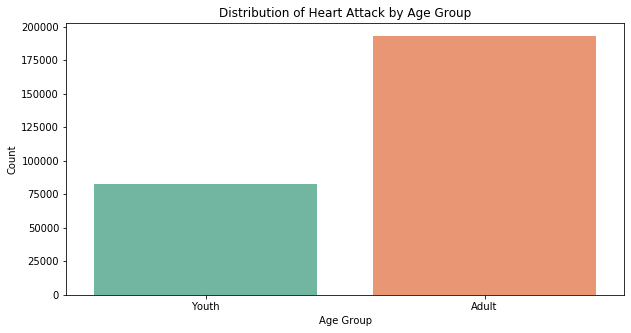

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Age_Group', data=data, palette='Set2')
plt.title("Distribution of Heart Attack by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

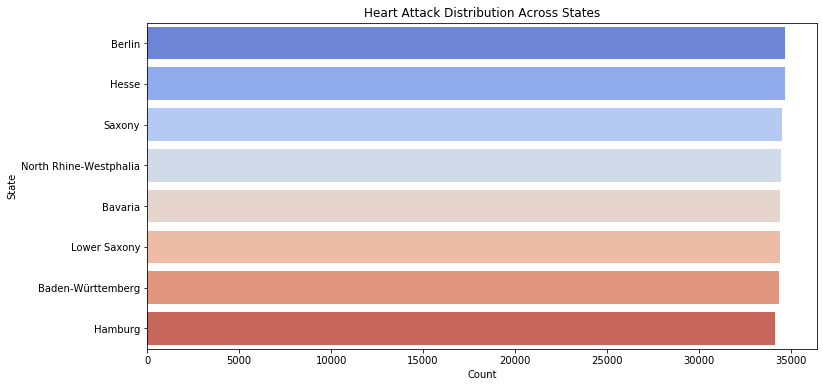

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(y='State', data=data, order=data['State'].value_counts().index, palette='coolwarm')
plt.title("Heart Attack Distribution Across States")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

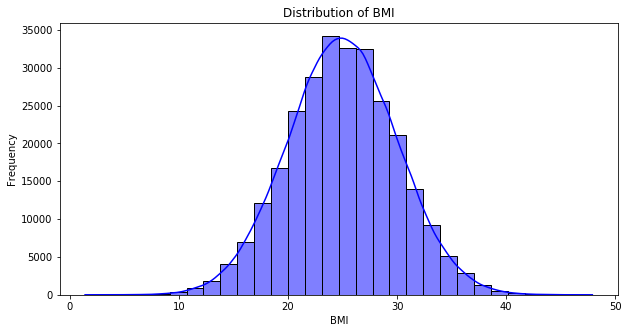

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data['BMI'], bins=30, kde=True, color='blue')
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

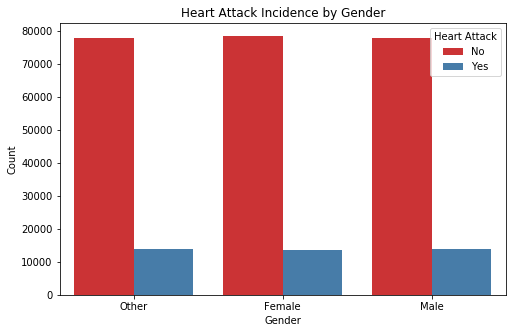

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Heart_Attack_Incidence', data=data, palette='Set1')
plt.title("Heart Attack Incidence by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Heart Attack", labels=["No", "Yes"])
plt.show()

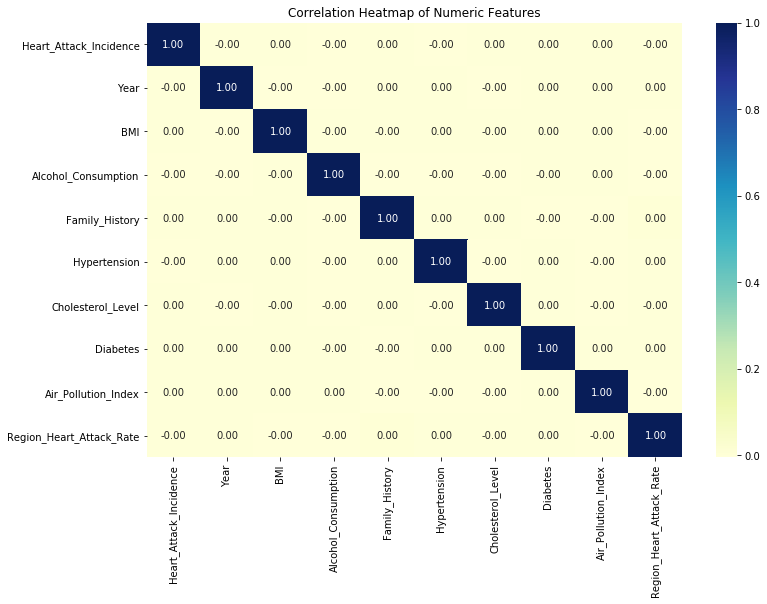

In [13]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Filter numeric columns
correlation_matrix = numeric_data.corr()  # Compute correlations

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [14]:
statewise_heart_attacks = data.groupby('State')['Heart_Attack_Incidence'].mean().sort_values(ascending=False)
print("\nStatewise Heart Attack Rate (Proportion):")
print(statewise_heart_attacks)


Statewise Heart Attack Rate (Proportion):
State
Hesse                     0.151302
Berlin                    0.151236
Saxony                    0.150429
Bavaria                   0.150334
Baden-Württemberg         0.150258
North Rhine-Westphalia    0.149360
Lower Saxony              0.148827
Hamburg                   0.148788
Name: Heart_Attack_Incidence, dtype: float64


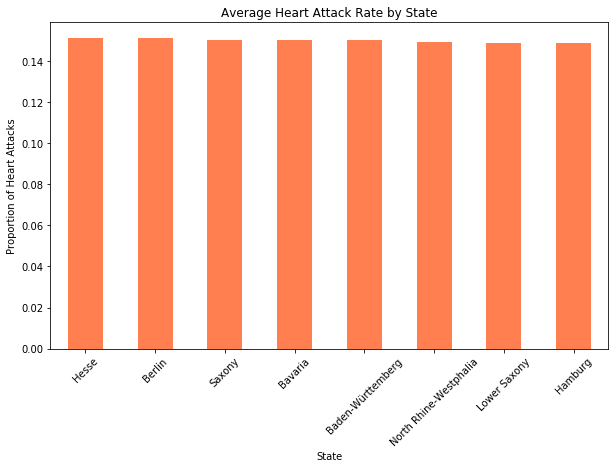

In [15]:
plt.figure(figsize=(10, 6))
statewise_heart_attacks.plot(kind='bar', color='coral')
plt.title("Average Heart Attack Rate by State")
plt.ylabel("Proportion of Heart Attacks")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.show()

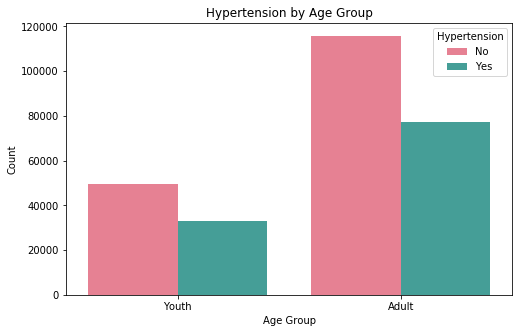

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='Hypertension', data=data, palette='husl')
plt.title("Hypertension by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Hypertension", labels=["No", "Yes"])
plt.show()

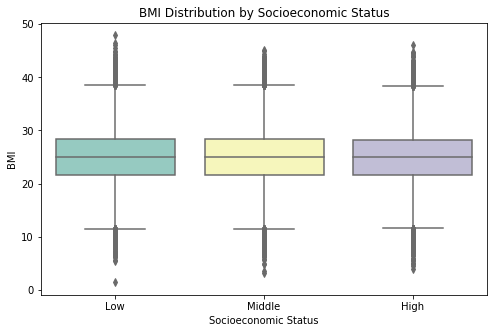

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Socioeconomic_Status', y='BMI', data=data, palette='Set3')
plt.title("BMI Distribution by Socioeconomic Status")
plt.xlabel("Socioeconomic Status")
plt.ylabel("BMI")
plt.show()